# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

In [7]:
pd.set_option('display.max_rows',None)

In [8]:
df=pd.read_csv('C:\\Users\\Kiran kumar T\\Desktop\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df.shape                      #check the shape in dataset

(1470, 35)

In [10]:
df['Attrition'].value_counts()            #check the value count of target variable.

No     1233
Yes     237
Name: Attrition, dtype: int64

# Exploratory Data Analysis 

# Graphical Representation

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

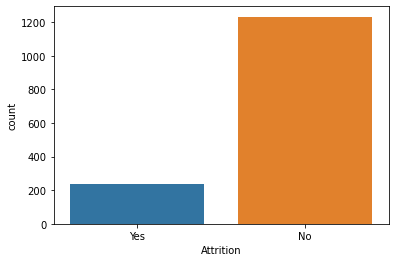

In [12]:
# Countplot Display distribution of data across all level of category
sns.countplot(x='Attrition',data=df);
plt.show()

Just by observing countplot, the attrition has almost 18% of Employee retention rate.

<AxesSubplot:xlabel='Age', ylabel='count'>

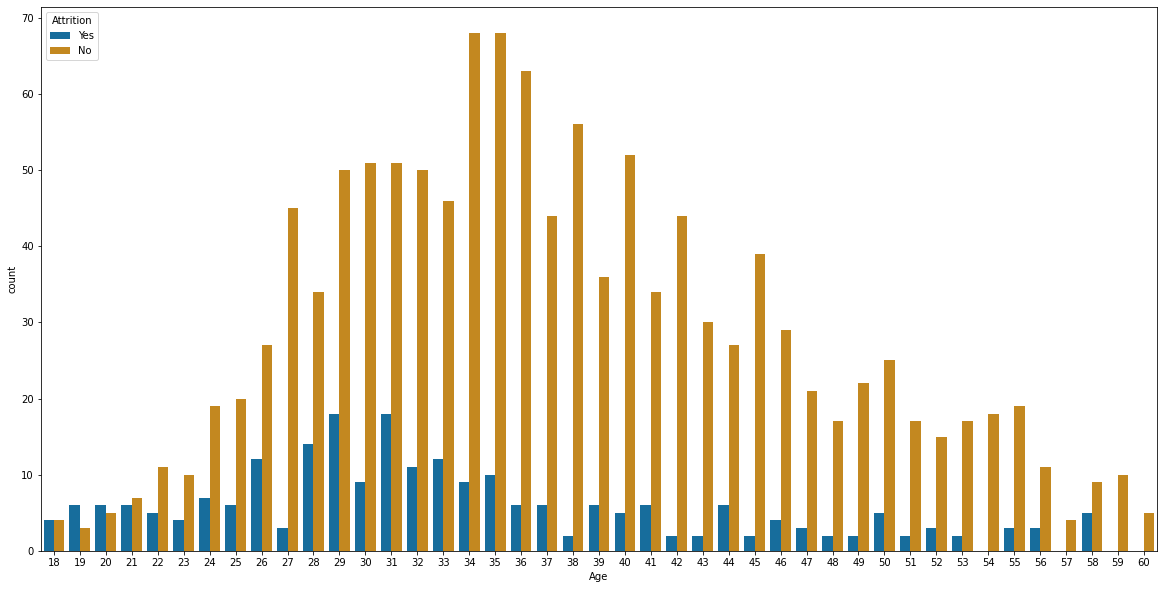

In [13]:
# Countplot Display distribution of data across Age vs Attrition.
plt.subplots(figsize=(20,10))
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

Just by observing countplot,the Attrition is high at the age of 34-35 years.The Employee retention rate is carried out more at age rate of 27 years to 42 years.

<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

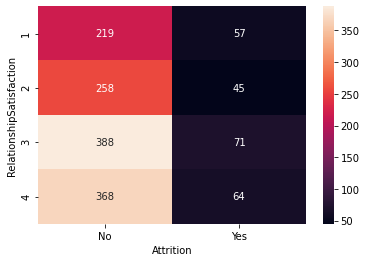

In [14]:
group=df.groupby(['RelationshipSatisfaction','Attrition'])
RelationshipSatisfaction_Attrition=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(RelationshipSatisfaction_Attrition, annot=True, fmt='d')

Just by observing heatmap,the Relationship satisfication is high at Class 3 level.

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

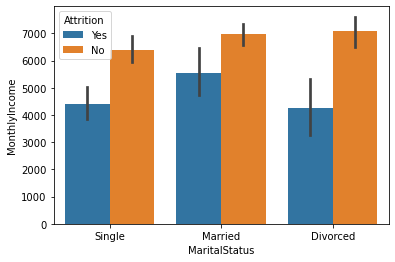

In [15]:
# Barplot Display distribution of data across all level of category
sns.barplot(x='MaritalStatus',y='MonthlyIncome',hue='Attrition',data=df)

Just by observing barplot,the monthly income is high for married person.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

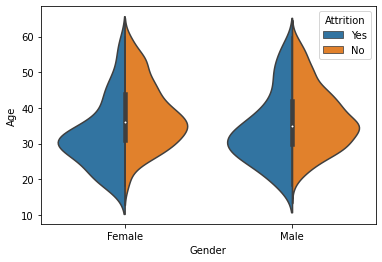

In [16]:
#Violinplot Display distribution of data across all level of category
sns.violinplot(x='Gender',y='Age',hue='Attrition',data=df, split=True)

 Just by observing voilinplot, the Attrition rate is high for male & female at age rate of 30 years.

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

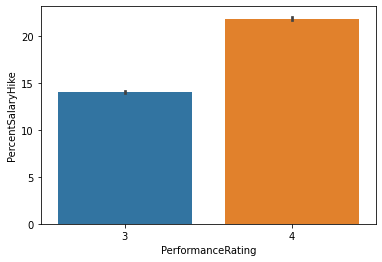

In [17]:
# Barplot Display distribution of data across all level of category
sns.barplot(x='PerformanceRating',y='PercentSalaryHike',data=df)

The percentage of salary hike is also high for employees whose performance rating is high.

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='YearsAtCompany'>

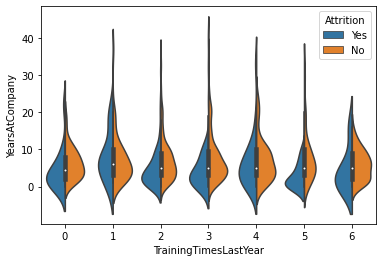

In [18]:
#Violinplot Display distribution of data across all level of category
sns.violinplot(x='TrainingTimesLastYear',y='YearsAtCompany',hue='Attrition',data=df, split=True)

Graphical Represention Conclusion:

According to the data,the average total turnover of all the companies is 18 percent & also indicates Good rentention rate of employees in companies.

# Preprocessing

In [19]:
df.columns                   #check the number of columns in ths dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [20]:
df.isnull().sum()             # Check isnull in dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

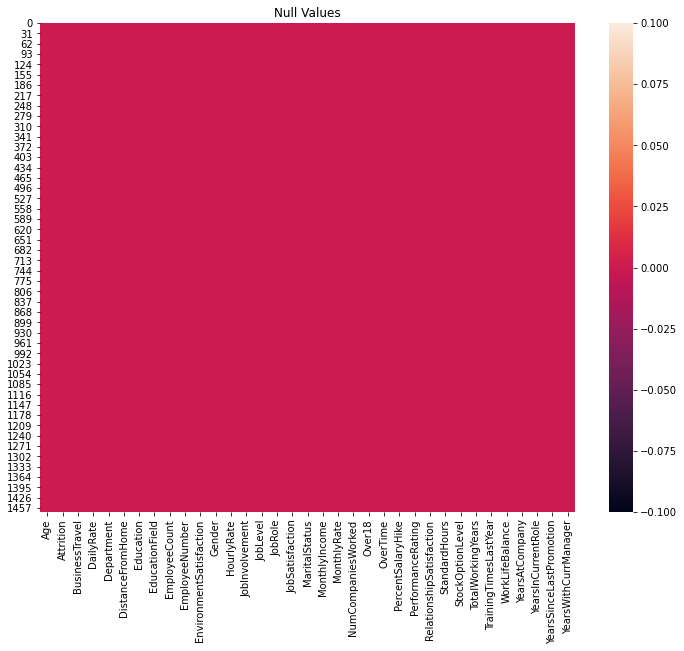

In [21]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [22]:
df.dtypes                        # Check datatypes in dataset

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are many object types is identiifed in columns features.So the data type should be converted into integer type using Label encoder preprocessing method.

Check unique functions of datasets

In [23]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Attrition']=label_encoder.fit_transform(df['Attrition'])
df['Attrition'].unique()

array([1, 0])

In [24]:
df['BusinessTravel']=label_encoder.fit_transform(df['BusinessTravel'])
df['BusinessTravel'].unique()

array([2, 1, 0])

In [25]:
df['Department']=label_encoder.fit_transform(df['Department'])
df['Department'].unique()

array([2, 1, 0])

In [26]:
df['EducationField']=label_encoder.fit_transform(df['EducationField'])
df['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])

In [27]:
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [28]:
df['JobRole']=label_encoder.fit_transform(df['JobRole'])
df['JobRole'].unique()

array([7, 6, 2, 4, 0, 3, 8, 5, 1])

In [29]:
df['MaritalStatus']=label_encoder.fit_transform(df['MaritalStatus'])
df['MaritalStatus'].unique()

array([2, 1, 0])

In [30]:
df['Over18']=label_encoder.fit_transform(df['Over18'])
df['Over18'].unique()

array([0])

In [31]:
df['OverTime']=label_encoder.fit_transform(df['OverTime'])
df['OverTime'].unique()

array([1, 0])

In [32]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

Converting all Object attributes into Numerical attributes by using LabelEncoder 

In [33]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [34]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [35]:
df.describe()                      #statistics summary for numerical columns

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

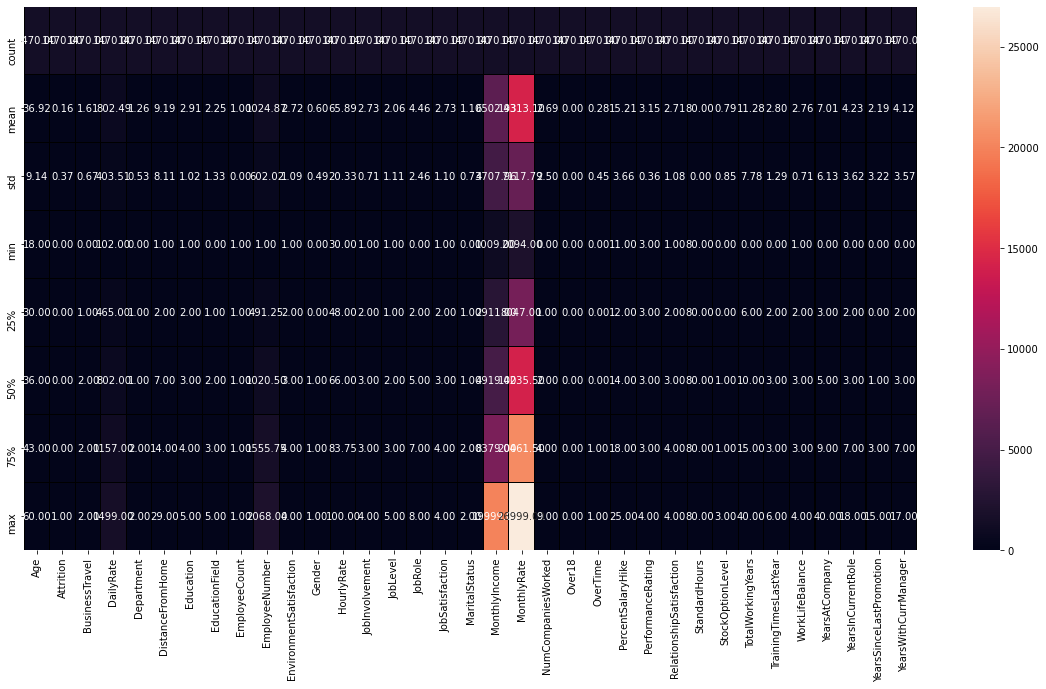

In [36]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation matrix

In [37]:
dfcor=df.corr()                    # Check Correlation in dataset
dfcor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

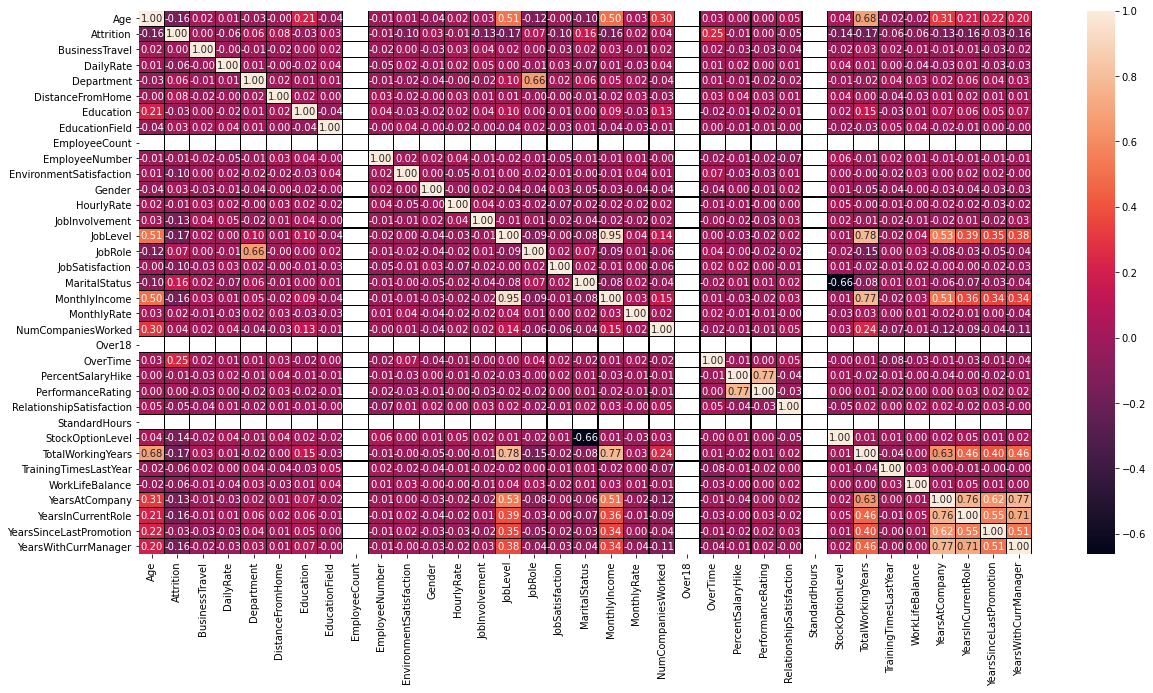

In [38]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Check Skewness in dataset

In [39]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [40]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

Skewness Handling

In [41]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

To handle Skewness using Power transform function.

In [42]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [43]:
df_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeCount               0.000000
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StandardHours               0.000000
StockOptionLevel            0.087019
T

In [44]:
x=df_new
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,0.0,-2.164110,-0.706596,-1.224745,1.354630,0.326033,0.241622,1.040668,1.192743,1.235505,0.0,0.747689,1.621331,0.0,1.591746,-1.488918,-0.423557,-1.529513,0.0,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.276411,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,0.0,-2.154174,0.208597,0.816497,-0.210675,-1.058710,0.241622,0.621571,-0.709062,-0.131447,0.0,1.397293,-0.571302,0.0,-0.628241,1.679689,2.348814,1.229016,0.0,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.102091,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,0.0,-2.136953,1.209516,0.816497,1.263094,-1.058710,-1.170135,-1.008957,0.197856,1.235505,0.0,-1.882611,1.271339,0.0,1.591746,0.201133,-0.423557,-0.700130,0.0,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.353971,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,0.0,-2.129176,1.209516,-1.224745,-0.460197,0.326033,-1.170135,0.621571,0.197856,-0.131447,0.0,1.193001,-0.571302,0.0,1.591746,-1.488918,-0.423557,0.225164,0.0,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.123755,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,0.0,-2.114724,-1.518118,0.816497,-1.289301,0.326033,-1.170135,-1.008957,-0.709062,-0.131447,0.0,0.386371,1.766182,0.0,-0.628241,-0.948760,-0.423557,1.229016,0.0,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881


# Classification model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is " ,maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8853255587949466  on Random_state  18


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .7, random_state =18)

# Logistic Regression model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8853255587949466
[[843  24]
 [ 94  68]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       867
           1       0.74      0.42      0.54       162

    accuracy                           0.89      1029
   macro avg       0.82      0.70      0.74      1029
weighted avg       0.87      0.89      0.87      1029



# Decision Tree Classifier model

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.7580174927113703
[[714 153]
 [ 96  66]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       867
           1       0.30      0.41      0.35       162

    accuracy                           0.76      1029
   macro avg       0.59      0.62      0.60      1029
weighted avg       0.79      0.76      0.77      1029



# Random Forest Classifier Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8513119533527697
[[865   2]
 [151  11]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       867
           1       0.85      0.07      0.13       162

    accuracy                           0.85      1029
   macro avg       0.85      0.53      0.52      1029
weighted avg       0.85      0.85      0.79      1029



# SVC Model

In [50]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8513119533527697
[[866   1]
 [152  10]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       867
           1       0.91      0.06      0.12       162

    accuracy                           0.85      1029
   macro avg       0.88      0.53      0.52      1029
weighted avg       0.86      0.85      0.79      1029



We are getting highest accuracy with LogisticRegression(89%). but it can be due to overhitting also so we well check cross validation scores.

# Cross Validation of model

In [51]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.8721088435374149


In [52]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.7653061224489794


In [53]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.8496598639455784


In [54]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.864625850340136


Min difference in accuracy and cross validation score is for Random Forest model . so this is our best model.

# Hyper parameter Tuning

In [55]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Hyperparameter tuning for Logistic Regression Model

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'C':[1e-5,1e-4,1e-2,1e-1,1,10,100]}
             
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [57]:
GCV.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [58]:
mod=LogisticRegression(C=0.1,penalty='l2',solver='newton-cg',random_state=18)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

87.85228377065111


ROC_AUC Score for Logistic Regressor Model

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf=LogisticRegression(C=0.1,penalty='l2',solver='newton-cg',random_state=18).fit(X,y)
roc_auc_score(y,clf.predict_proba(X)[:,1])
roc_auc_score(y,clf.decision_function(X))

0.9932086041963956

ROC_AUC curve for Logistic Regressor Model

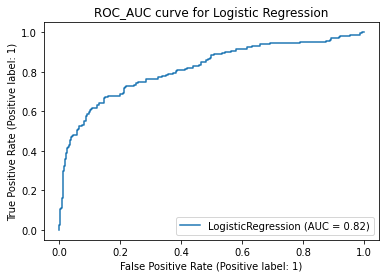

In [60]:
lr=LogisticRegression(C=0.1,penalty='l2',solver='newton-cg',random_state=18)
lr.fit(x_train,y_train)
lr_disp=plot_roc_curve(lr,x_test,y_test)
plt.title('ROC_AUC curve for Logistic Regression')
plt.show()

Hyperparameter tuning for Decision Tree Classifier Model

In [61]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [62]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [63]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=18)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.93683187560738


ROC_AUC Score for Decision Tree Classifier Model

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf1=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=18).fit(X,y)
roc_auc_score(y,clf1.predict_proba(X)[:,1])

0.9988372707573596

ROC_AUC curve for Decision Tree Classifier Model

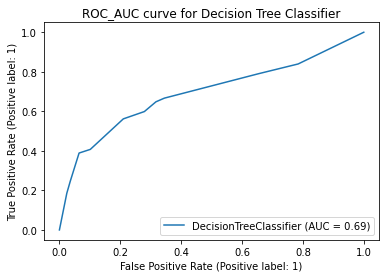

In [65]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=18)
dt.fit(x_train,y_train)
dt_disp=plot_roc_curve(dt,x_test,y_test)
plt.title('ROC_AUC curve for Decision Tree Classifier')
plt.show()

Hyperparameter tuning for Random Forest Classifier Model

In [66]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [67]:
GCV.best_params_

{'max_features': 'auto'}

In [68]:
mod=RandomForestClassifier(max_features='auto',random_state=18)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.13119533527697


ROC_AUC Score for Random Forest Classifier Model

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=RandomForestClassifier(max_features='auto',random_state=18).fit(X,y)
roc_auc_score(y,clf2.predict_proba(X)[:,1])

1.0

ROC_AUC curve for Random Forest Classifier Model

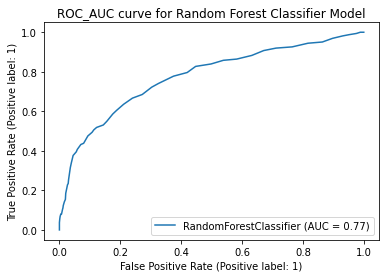

In [70]:
rf=RandomForestClassifier(max_features='auto',random_state=18)
rf.fit(x_train,y_train)
rf_disp=plot_roc_curve(rf,x_test,y_test)
plt.title('ROC_AUC curve for Random Forest Classifier Model')
plt.show()

Hyperparameter tuning for SVC model

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
GCV=GridSearchCV(SVC(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [72]:
GCV.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [73]:
mod=SVC(C=100,gamma=0.001,kernel='rbf',random_state=18)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

87.65792031098154


ROC_AUC Score for SVC Model

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=SVC(C=100,gamma=0.001,kernel='rbf',random_state=18).fit(X,y)
roc_auc_score(y,clf2.predict(X))

1.0

ROC_AUC curve for SVC Model

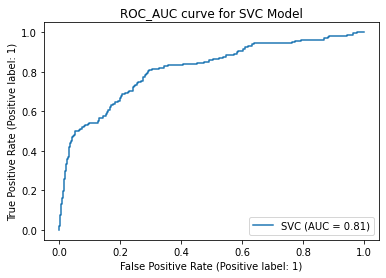

In [75]:
svc=SVC(C=100,gamma=0.001,kernel='rbf',random_state=18)
svc.fit(x_train,y_train)
svc_disp=plot_roc_curve(svc,x_test,y_test)
plt.title('ROC_AUC curve for SVC Model')
plt.show()

Compare with Actual Final Vs Sample Prediction

,Y Test,Prediction
1311,0,0
202,0,0
1094,0,0
997,1,0
129,0,0


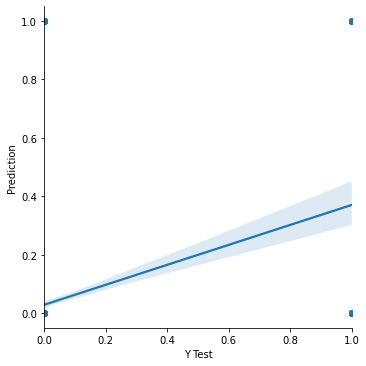

In [76]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model

In [77]:
import joblib
joblib.dump(mod,"HR Analytics Project.pkl")

['HR Analytics Project.pkl']

# Loading the saved model

In [78]:
model=joblib.load("HR Analytics Project.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

87.65792031098154


In [79]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame
prediction.to_csv('Results of HR Analytics Project.csv')
prediction.head()

,0
0,0
1,0
2,0
3,0
4,0
